In [ ]:
#Nathaniel Graf
#12208076

#Problem 1

import numpy as np

def svd_form(a):

    #Convert to numpy array
    A = np.array(a, dtype=float)
   
    m = len(A) 
    n = len(A[0]) 
    
    #Calculate ATA
    ATA = A.T @ A
    
    #Get eigenvectors and values 
    eigenvalues, V = np.linalg.eig(ATA)
    
   #Sort eigenvalues big to small and make index pair combos
    eig_list = []
    for i in range(len(eigenvalues)):
        eig_list.append((eigenvalues[i], i))
        
    eig_list.sort(reverse=True)
    
    
    #Reorder V
    singular_values = []
    V_sorted = np.zeros((n, n))
    
    #Get
    for i in range(len(eig_list)):
        eig, old_index = eig_list[i]
        
        #Move the column at the old index to the new position
        V_sorted[:, i] = V[:, old_index]
        
        #Get singular value if positive
        if eig > 0:
            singular_values.append(np.sqrt(eig))
        else: 
            singular_values.append(0.0)
    
    
    V = V_sorted
    
    #Build U matrix using A and V, formula A*V*(1/singular_value)
    U = np.zeros((m, m))
    for i in range(min(m, n)):
        if singular_values[i] > 1e-10:
            U[:, i] = (A @ V[:, i]) / singular_values[i]
    
    #If m > n, fill in remaining columns of U
    if m > len(singular_values):
        #Use random vectors and make them orthogonal
        for i in range(len(singular_values), m):
            
            vec = np.random.randn(m)
            
            #Make orthogonal to prev columns
            for j in range(i):
                vec = vec - np.dot(vec, U[:, j]) * U[:, j]
                
            #Normalize
            vec = vec / np.linalg.norm(vec)
            U[:, i] = vec
    
    #Create sigma matrix, singular values along diagonal in order
    S = np.zeros((m, n))
    for i in range(min(m, n)):
        if i < len(singular_values):
            S[i, i] = singular_values[i]

    VT = V.T
    
    #Check completion by calc error
    reconstructed = U @ S @ VT

    error = np.linalg.norm(A - reconstructed)
    
    print(f"Error: {error}")
    
    return U, S, VT


#Test cases
print("\nTest 1: 15x20")
a = np.random.randint(low=-3, high=3, size=(15, 20))
svd_form(a)

print("\nTest 2: 25x10")
b = np.random.randint(low=-3, high=3, size=(25, 10))
svd_form(b)



Test 1: 15x20
Error: 9.802476796639857e-14

Test 2: 25x10
Error: 3.89531971464688e-14


C:\Users\natha\AppData\Local\Temp\ipykernel_22708\66084638.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  V_sorted[:, i] = V[:, old_index]
C:\Users\natha\AppData\Local\Temp\ipykernel_22708\66084638.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:, i] = (A @ V[:, i]) / singular_values[i]
C:\Users\natha\AppData\Local\Temp\ipykernel_22708\66084638.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  S[i, i] = singular_values[i]


(array([[ 0.01815289,  0.15185896, -0.10147172,  0.48381335,  0.03458641,
         -0.09322999, -0.30193561,  0.0698877 ,  0.19153114,  0.00850159,
          0.03469243,  0.37616665, -0.10649988, -0.15034673,  0.38848955,
          0.01519353,  0.021566  ,  0.17353521, -0.13093842, -0.18496357,
         -0.22954463, -0.32661266, -0.05317586, -0.13054522, -0.02377078],
        [ 0.14703637,  0.22163674, -0.32028654, -0.06286393, -0.27554149,
          0.17442081, -0.0867627 , -0.13783813, -0.18111363,  0.00192237,
          0.13436184, -0.01384145, -0.15301482, -0.29857816, -0.10867408,
         -0.1308279 ,  0.31043295, -0.00554355, -0.00926921,  0.13243801,
          0.03890932, -0.16786371, -0.33471728,  0.46585005, -0.15665605],
        [ 0.29151443, -0.02051375, -0.28299021, -0.21995408,  0.01953911,
          0.06708634,  0.49747464, -0.21872836,  0.39395733, -0.2690422 ,
          0.1411625 , -0.16388061,  0.02224247,  0.01421079,  0.30330887,
         -0.03205941, -0.08165524,  

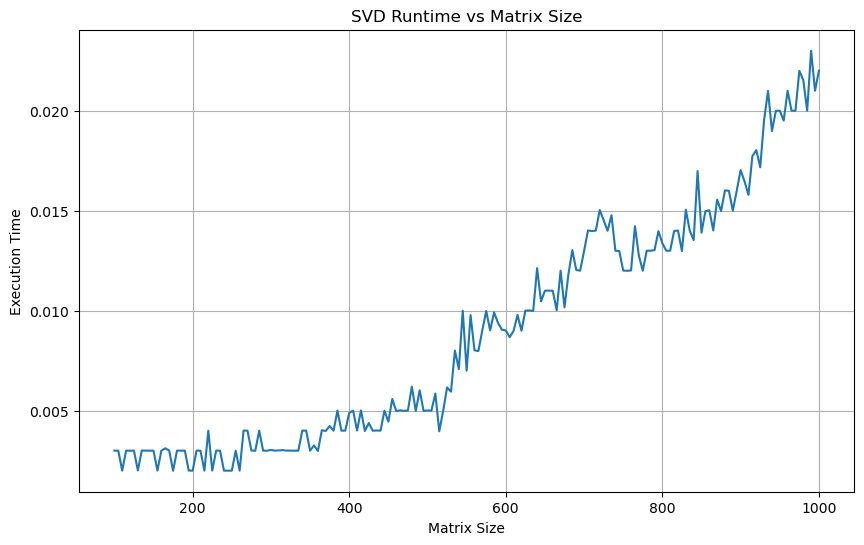

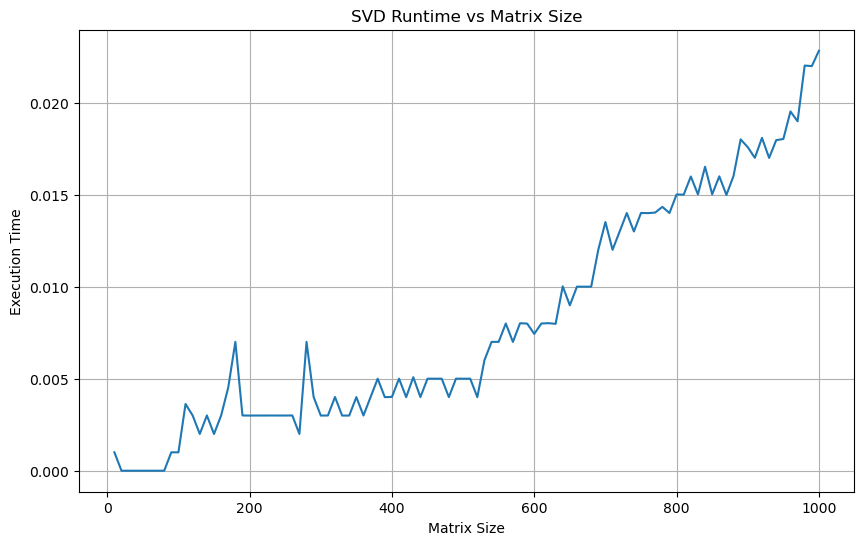

In [11]:
#Problem 2

import time
import matplotlib.pyplot as plt

#Compute execution times for all matrices in our test set 
def compute_execution_times(start_size=100, end_size=1000, increment=5):
    matrix_sizes = list(range(start_size, end_size + increment, increment))
    execution_times = []
    
    for n in matrix_sizes:
        #Generate random matrix of size 10xn
        matrix = np.random.rand(10, n)
        
        #Measure SVD runtime
        start_time = time.time()
        np.linalg.svd(matrix)
        end_time = time.time()
        
        execution_times.append(end_time - start_time)
    
    return matrix_sizes, execution_times

start_size = 100
end_size = 1000
increment = 5

matrix_sizes, execution_times = compute_execution_times(start_size, end_size, increment)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, execution_times)
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time')
plt.title('SVD Runtime vs Matrix Size')
plt.grid(True)
plt.show()

#Test with second set: 

start_size = 10
end_size = 1000
increment = 10

matrix_sizes, execution_times = compute_execution_times(start_size, end_size, increment)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, execution_times)
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time')
plt.title('SVD Runtime vs Matrix Size')
plt.grid(True)
plt.show()



I am a little confused on the runtime we see in the visualization here, since even though the 1000 case should be approximately 125x
longer by the theoretical O, in our test it looks like it's only 8x longer? 
Our graph should be growing cubically with n, so n^3 dominating, but it doesn't look like it in our visualization, strange? 

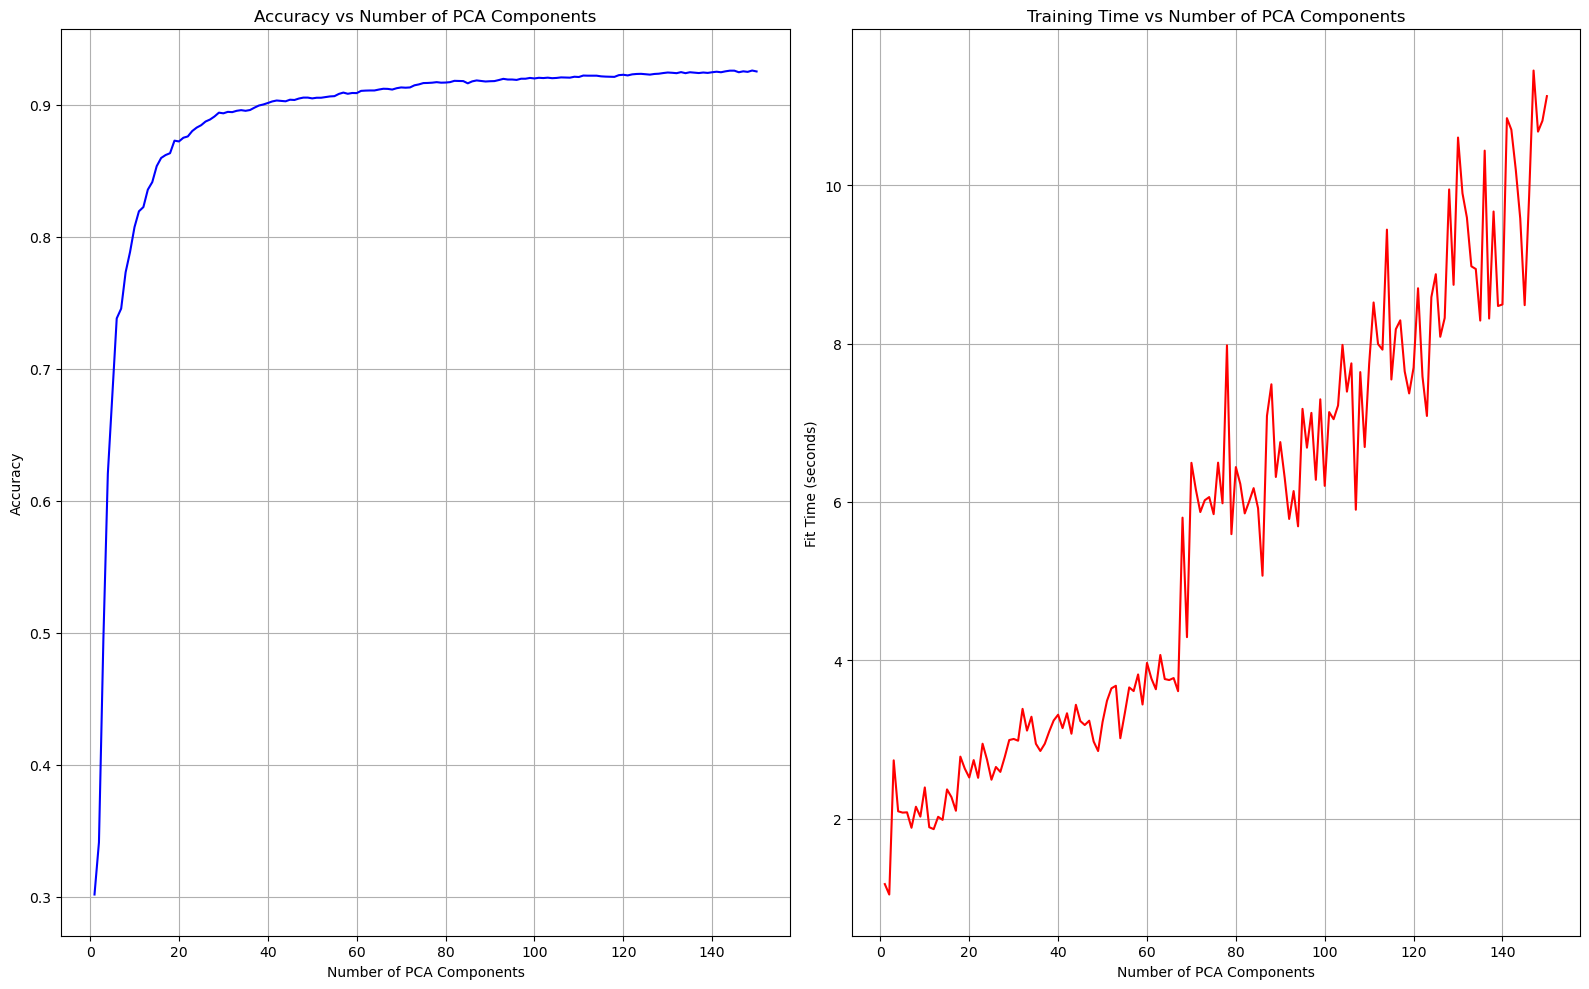

In [9]:
#Problem 3111

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

#Split into training and test sets 60000 train 10000 test
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Make PCA set
max_components = 150
component_range = range(1, max_components + 1)
accuracies = []
fit_times = []

for k in component_range:
    
    #Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    #Train logistic regression and measure time
    model = LogisticRegression(max_iter=1000)
    start_time = time.time()

    model.fit(X_train_pca, y_train)
    end_time = time.time()
    
    fit_time = end_time - start_time
    fit_times.append(fit_time)
    
    #Calculate accuracy
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

#Plot accuracy vs components
ax1.plot(list(component_range), accuracies, color='blue')
ax1.set_xlabel('Number of PCA Components')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Number of PCA Components')
ax1.grid(True)

#Plot fit time vs components
ax2.plot(list(component_range), fit_times, color='red')
ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Fit Time (seconds)')
ax2.set_title('Training Time vs Number of PCA Components')
ax2.grid(True)

plt.tight_layout()
plt.show()



Based on the plots, we can see that as k increases, accuracy increases, and fit time also gets longer. 
Accuracy seems to increase rapidly at the start, but then quickly plateaus, giving diminishing returns.
Fit time, however, gets much higher as k increases and does not drop off.
This means you want to strive for a balance of k such that accuracy is high, but you don't take forever training. 